In [43]:
%matplotlib inline
import glob
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read_files = glob.glob(os.path.join("outfile_*.txt"))
array = []
filename= []
for files in read_files:
#    print(files)
    data = pd.read_csv(files,header=None, sep='\,')
    array.append(data)
    filename.append(files)
    new_set = {x.replace('outfile_', '').replace('.txt', '') for x in filename}
df1 = pd.DataFrame(array)
df1.to_csv('df.csv',header=None, index=False)
df= pd.read_csv('df.csv', sep='   ', header = None)
df = df.drop(df.columns[[0, 1]], axis=1)
df = df.dropna().reset_index(drop=True)
df_bt = df.reset_index(drop=True)
df_bt.columns=['BTemp_effR_14'] # change the parameter
df_new = pd.DataFrame(new_set, columns=['LWC'])
df_eff = df_new['LWC'].sort_values().reset_index(drop=True)
modified = pd.concat([df_eff,df_bt], axis=1)
result = modified.sort_values(['BTemp_effR_14','LWC'],ascending=[1, 0]).reset_index(drop=True) #change parameter
result.to_csv('Reff_14.csv', index=False,sep=' ') # change parameter

C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [44]:
allFiles = glob.glob(os.path.join("Reff_*.csv"))

np_array_list = []
for file_ in allFiles:
    data = pd.read_csv(file_,index_col=None, header=0, sep=' ')
    np_array_list.append(data.as_matrix())

comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)
big_frame.columns = ["LWC","Btemp"]
#big_frame.head(10)
big_frame.to_csv('CTH_LWC_Btemp_450m.csv', index=False,sep=' ')

C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


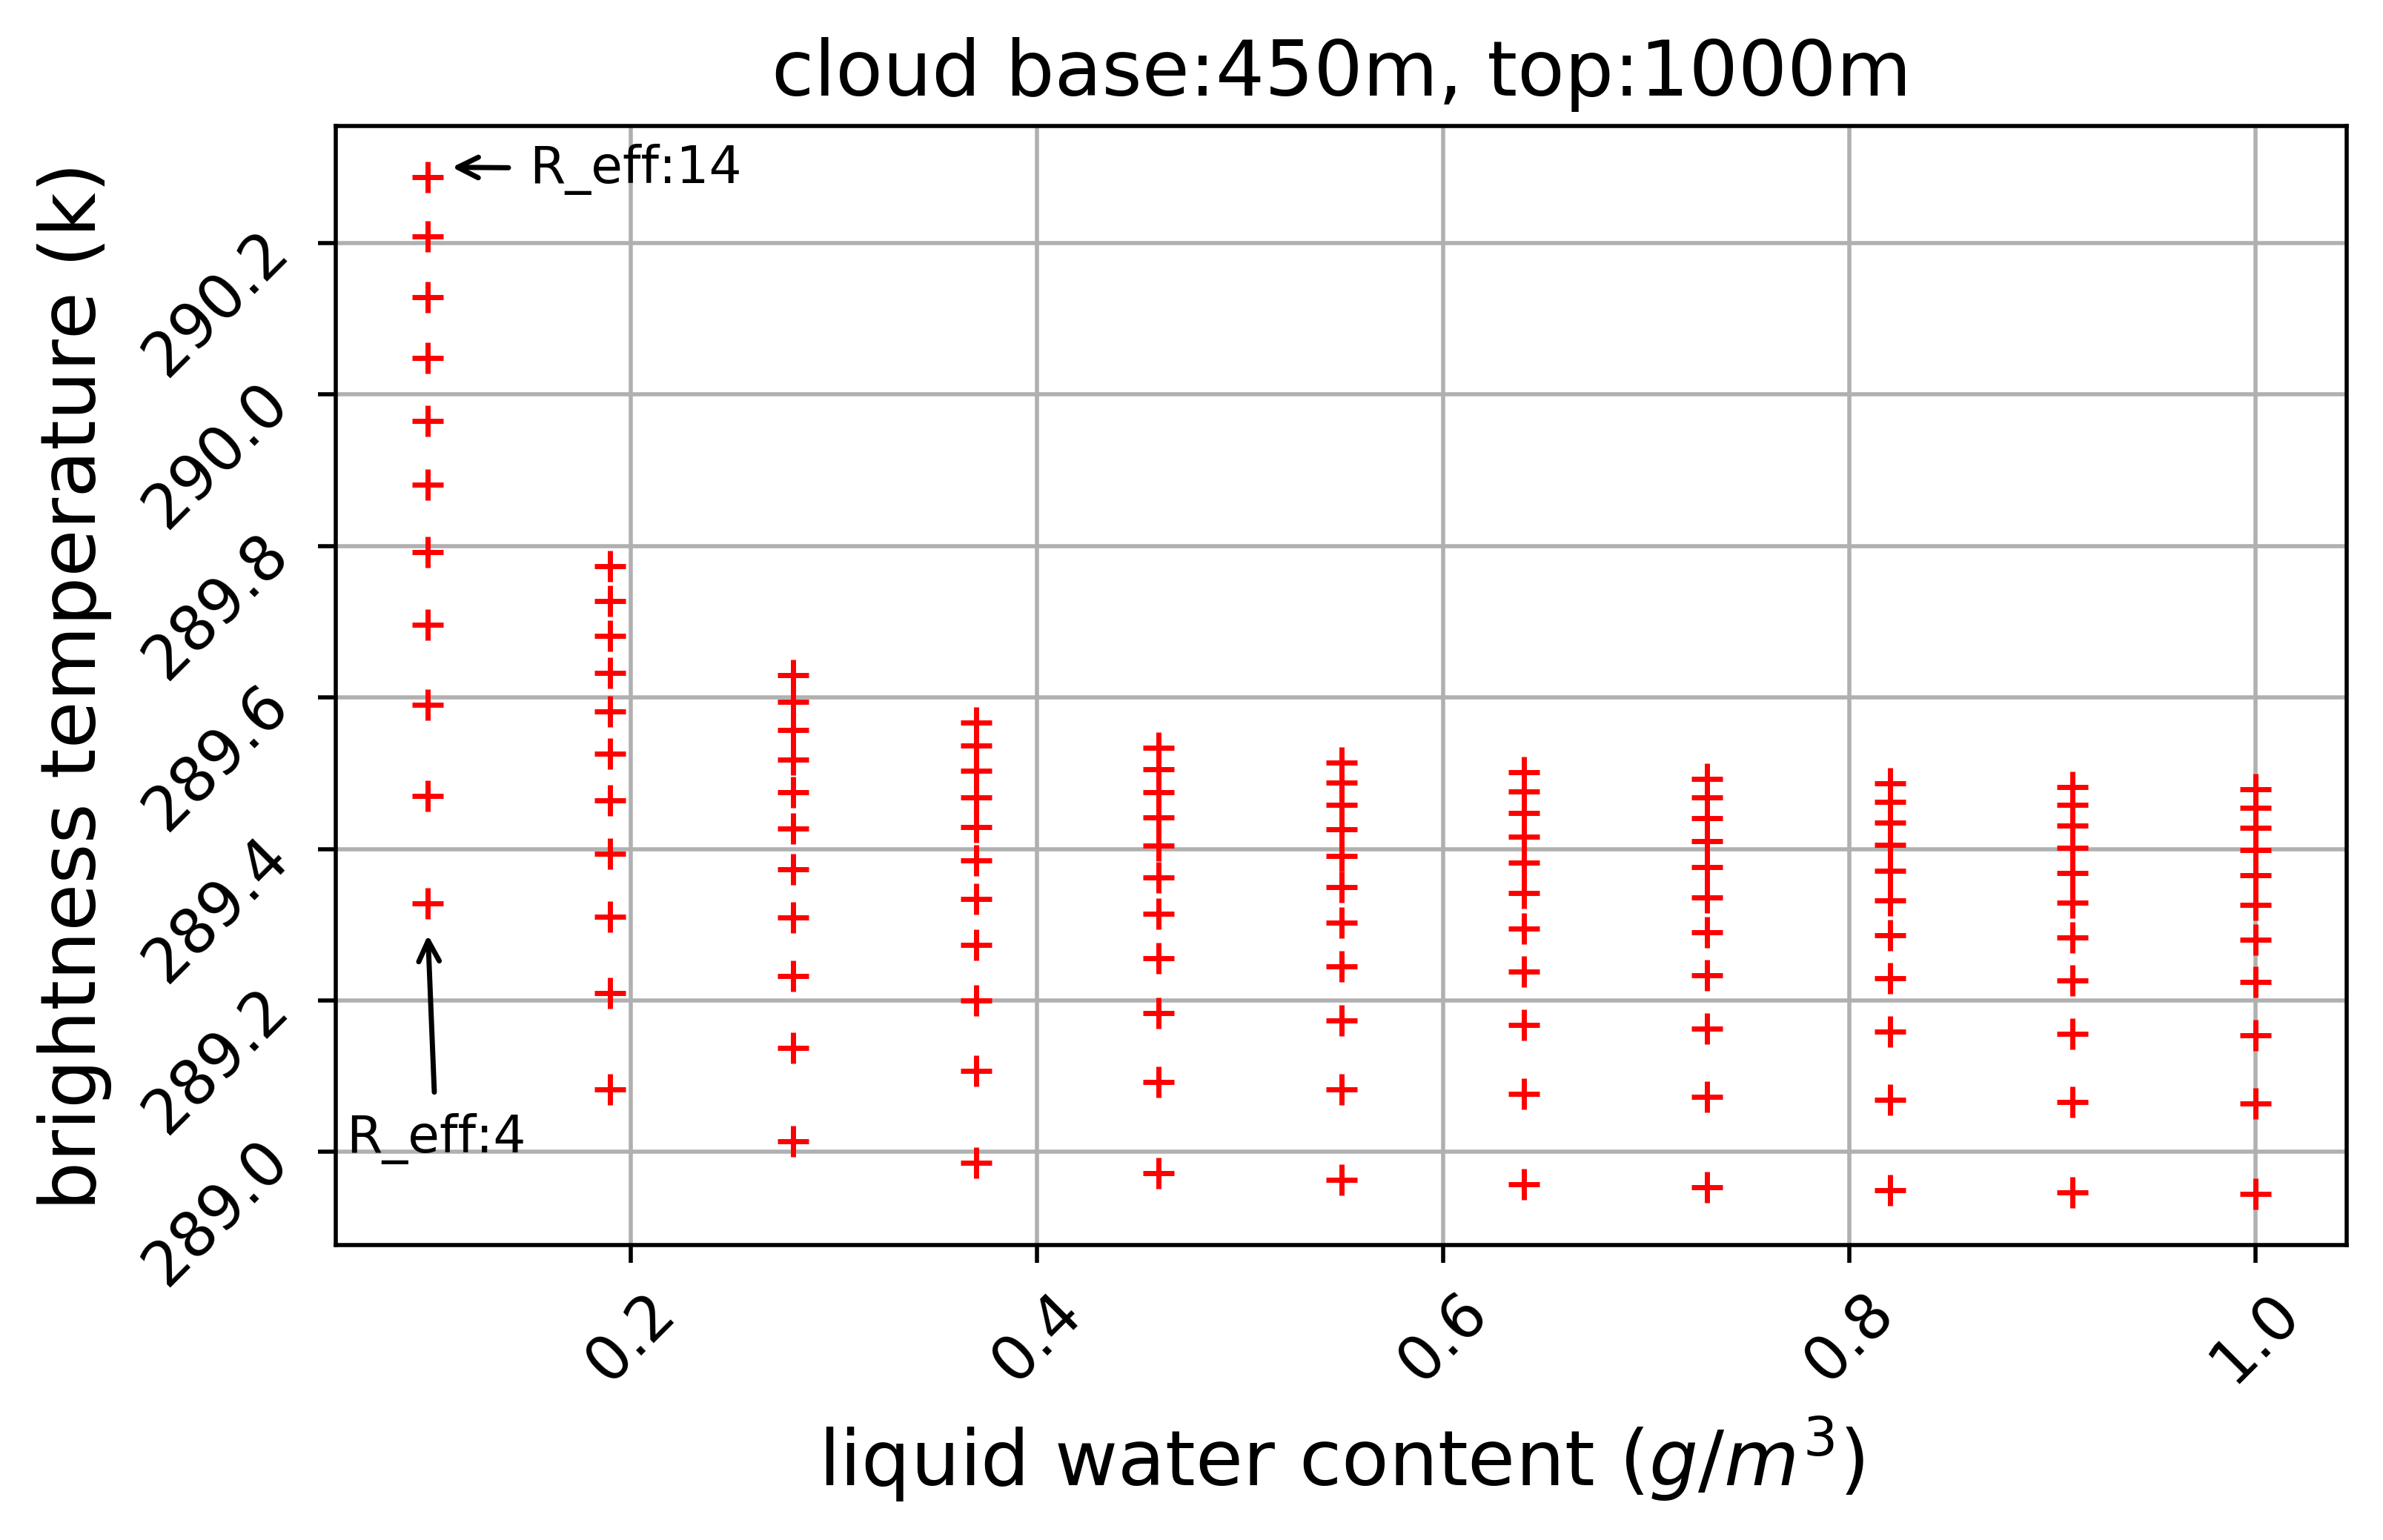

In [55]:
import matplotlib.pyplot as plt
dat=pd.read_csv('CTH_LWC_Btemp_450m.csv',sep=' ')
plt.figure(figsize=(7,4),dpi=500)
plt.plot(dat.LWC,dat.Btemp, 'r+')
#, label='cloud height: 500m'
plt.xlabel('liquid water content ($g/m^3$)', fontsize=15)
plt.ylabel('brightness temperature (k)', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
#plt.xlim([0,1.1])
#plt.ylim([274.5,277])
plt.grid('both')
plt.annotate('R_eff:14', xy=(0.107, 290.3), xytext=(0.15, 290.28),
           arrowprops=dict(arrowstyle="->"))
plt.annotate('R_eff:4', xy=(0.1, 289.3), xytext=(0.06, 289),
           arrowprops=dict(arrowstyle="->"))
# plt.annotate('LWC:0.1', xy=(15.3, 271.41), xytext=(16.3, 271.4),
#             arrowprops=dict(arrowstyle="->"))
# plt.annotate('LWC:1', xy=(15.3, 270.29), xytext=(16.3, 270.2),
#              arrowprops=dict(arrowstyle="->"))
# plt.legend()
plt.title('cloud base:450m, top:1000m', fontsize=15)
plt.show()